# API Project - Using Spotify and ChatGPT API

Project Description:

This projects uses the Spotify API to retrieve you discovery weekly playlist and all liked songs from your spotify account, which is an automatically generated playlist updated every monday. The playlist is then parsed through OpenAI API using GPT4 in order to add a genre to each song (which is often missing in Spotify data). The data is thereafter analysed and the following is presented to you in summarised form. The following results is then compared to your full set of liked tracks.

- Popularity of the songs (by analysing temperature data)
- How mainstream the music is (by analysing follower data)
- Most common genres (using Spotify data and data enrichment by OpenAI API)

The Project includes the following:

1) Installation/import of libraries
2) Spotify API to retrieve data         ---------- [ADD YOUR SPOTIFY DETAILS HERE]
3) OpenAI API to add genre to playlist   ------[ADD YOUR OPENAI KEY HERE]
4) Data Cleaning
5) Data Analysis
6) OpenAI API to add story to playlist
7) OpenAI API to summarize share of electronic music

# 1) Installation and Libraries

In [8]:
# Install OpenAI Python Library

In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install Spotify Python Library

In [3]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Open-AI API
import openai

# Import Spotify API
import spotipy  
from spotipy.oauth2 import SpotifyOAuth  
from spotipy.oauth2 import SpotifyClientCredentials

# Data Analysis and General Libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Spotify API 

In [2]:
url = "https://api.spotify.com"

### Retrieve Discover Weekly 30 Songs

In [3]:
# Initialize Spotipy with OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='[UPDATE CLIENT ID]',
                                               client_secret='[CLIENT SECRET]',
                                               redirect_uri='http://localhost:8080/',
                                               scope='user-library-read user-read-private'))

# Get the "Discover Weekly" playlist ID
playlist = sp.user_playlist('eldrone[USERNAME HERE]', '[UPDATE YOUR PLAYLIST HERE]https://open.spotify.com/playlist/37i9dQZEVXcDMxxJ5B9T5B?si=82a31e5112fe41b6')

# Get the tracks in the "Discover Weekly" playlist
tracks = playlist['tracks']['items']

# Create empty track info list
track_info_list = []

# Loop through the tracks and retrieve all the info
for idx, item in enumerate(tracks[:30], start=1):
    track = item['track']
    track_name = track['name']
    artists = ", ".join([artist['name'] for artist in track['artists']])
    
    # Retrieve track details including artist ID
    track_details = sp.track(track['id'])
    
    # Get artist ID from the first artist of the track
    artist_id = track_details['artists'][0]['id']
    
    # Retrieve artist details
    artist_details = sp.artist(artist_id)
    
    # Get artist genres, popularity, and followers
    genres = artist_details.get('genres', ['Genre not available'])
    popularity = artist_details.get('popularity', 'Popularity not available')
    followers = artist_details.get('followers', {}).get('total', 'Followers not available')
    
    track_uris = [track['uri']]
    audio_features = sp.audio_features(track_uris)
    
    # Extract audio features from the response
    if audio_features:
        acousticness = audio_features[0].get('acousticness')
        danceability = audio_features[0].get('danceability')
        tempo = audio_features[0].get('tempo')
        instrumentalness = audio_features[0].get('instrumentalness')
        liveness = audio_features[0].get('liveness')
        loudness = audio_features[0].get('loudness')
        speechiness = audio_features[0].get('speechiness')
        time_signature = audio_features[0].get('time_signature')
        valence = audio_features[0].get('valence')
    else:
        # Handle the case where audio features are not available
        acousticness = 'N/A'
        danceability = 'N/A'
        tempo = 'N/A'
        instrumentalness = 'N/A'
        liveness = 'N/A'
        loudness = 'N/A'
        speechiness = 'N/A'
        time_signature = 'N/A'
        valence = 'N/A'
    
    print(f"{idx}. Song: {track_name}\n   Artist(s): {artists}\n   Genre(s): {', '.join(genres)}\n Popularity: {popularity}\n Followers: {followers}")
    
    track_info = {
        "Song": track_name,
        "Artist(s)": artists,
        "Genre(s)": genres,
        "Popularity": popularity,
        "Followers": followers,
        "Acousticness": acousticness,
        "Danceability": danceability,
        "Tempo": tempo,
        "Instrumentalness": instrumentalness,
        "Liveness": liveness,
        "Loudness": loudness,
        "Speechiness": speechiness,
        "Time Signature": time_signature,
        "Valence": valence
    }
    
    # Append the track information to the list
    track_info_list.append(track_info)

print(track_info_list)

1. Song: Celestial
   Artist(s): Nomyn
   Genre(s): 
 Popularity: 37
 Followers: 20027
2. Song: Seaside
   Artist(s): Attom
   Genre(s): 
 Popularity: 44
 Followers: 41885
3. Song: Meet You There
   Artist(s): LE YORA, SOMMA, Jewels, yuma., MAGNUS
   Genre(s): 
 Popularity: 27
 Followers: 1178
4. Song: falling easy
   Artist(s): sad face.
   Genre(s): 
 Popularity: 26
 Followers: 2260
5. Song: Way Back
   Artist(s): Boeuv
   Genre(s): 
 Popularity: 20
 Followers: 574
6. Song: Damaged Friday
   Artist(s): eeph, Jani, Feverkin
   Genre(s): 
 Popularity: 11
 Followers: 671
7. Song: Forever Young - Morgin Madison Remix
   Artist(s): JES, Morgin Madison
   Genre(s): trance, vocal trance
 Popularity: 41
 Followers: 28147
8. Song: Manzanita
   Artist(s): Surf Mesa
   Genre(s): pop edm
 Popularity: 60
 Followers: 162169
9. Song: Goosebumps
   Artist(s): Whammyboy
   Genre(s): 
 Popularity: 30
 Followers: 2373
10. Song: Tell Me
   Artist(s): Hermei
   Genre(s): wave
 Popularity: 32
 Followers: 

In [4]:
dw_data = pd.DataFrame(track_info_list)

In [6]:
# Take only the song, artist and genre to send through OpenAI API
dw_data_gpt = dw_data[["Song","Artist(s)","Genre(s)"]]

In [1]:
df_data_gpt

NameError: name 'df_data_gpt' is not defined

### Retrieve all Liked Songs

In [8]:
"""

from requests.exceptions import ReadTimeout

# Initialize Spotipy with OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='[UPDATE THIS]',
                                               client_secret='[UPDATE THIS]',
                                               redirect_uri='http://localhost:8080/',
                                               scope='user-library-read user-read-private'))

# Initialize variables
track_info_list = []
offset = 0
limit = 50  # Adjust this value based on your needs
max_retries = 3  # Maximum number of retry attempts

# Function to get liked songs with retries
def get_liked_songs_with_retry():
    retries = 0
    while retries < max_retries:
        try:
            # Get the next batch of liked songs
            playlist = sp.current_user_saved_tracks(limit=limit, offset=offset)
            liked_songs = playlist['items']
            return liked_songs
        except ReadTimeout as e:
            print(f"Request timed out. Retrying ({retries + 1}/{max_retries})...")
            retries += 1

    return []

# Loop through the liked songs using pagination
while True:
    # Get the next batch of liked songs with retries
    liked_songs = get_liked_songs_with_retry()

    if not liked_songs:
        break  # No more songs to retrieve

    # Process each song in the batch
    for idx, item in enumerate(liked_songs, start=offset + 1):
        track = item['track']
        track_name = track['name']
        artists = ", ".join([artist['name'] for artist in track['artists']])

        # Retrieve track details including artist ID
        track_details = sp.track(track['id'])

        # Get artist ID from the first artist of the track
        artist_id = track_details['artists'][0]['id']

        # Retrieve artist details
        artist_details = sp.artist(artist_id)

        # Get artist genres, popularity, and followers with .get
        genres = artist_details.get('genres', ['Genre not available'])
        popularity = artist_details.get('popularity', 'Popularity not available')
        followers = artist_details.get('followers', {}).get('total', 'Followers not available')

        track_uris = [track['uri']]
        audio_features = sp.audio_features(track_uris)

        # Check if audio features are available for the song with .get
        if audio_features and audio_features[0]:
            acousticness = audio_features[0].get('acousticness', 'N/A')
            danceability = audio_features[0].get('danceability', 'N/A')
            tempo = audio_features[0].get('tempo', 'N/A')
            instrumentalness = audio_features[0].get('instrumentalness', 'N/A')
            liveness = audio_features[0].get('liveness', 'N/A')
            loudness = audio_features[0].get('loudness', 'N/A')
            speechiness = audio_features[0].get('speechiness', 'N/A')
            time_signature = audio_features[0].get('time_signature', 'N/A')
            valence = audio_features[0].get('valence', 'N/A')
        else:
            # Handle the case where audio features are not available
            acousticness = 'N/A'
            danceability = 'N/A'
            tempo = 'N/A'
            instrumentalness = 'N/A'
            liveness = 'N/A'
            loudness = 'N/A'
            speechiness = 'N/A'
            time_signature = 'N/A'
            valence = 'N/A'

        print(f"{idx}. Song: {track_name}\n   Artist(s): {artists}\n   Genre(s): {', '.join(genres)}\n Popularity: {popularity}\n Followers: {followers}")

        track_info = {
            "Song": track_name,
            "Artist(s)": artists,
            "Genre(s)": genres,
            "Popularity": popularity,
            "Followers": followers,
            "Acousticness": acousticness,
            "Danceability": danceability,
            "Tempo": tempo,
            "Instrumentalness": instrumentalness,
            "Liveness": liveness,
            "Loudness": loudness,
            "Speechiness": speechiness,
            "Time Signature": time_signature,
            "Valence": valence
        }

        # Append the track information to the list
        track_info_list.append(track_info)

    offset += limit

print(track_info_list)

"""

'\n\nfrom requests.exceptions import ReadTimeout\n\n# Initialize Spotipy with OAuth\nsp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=\'ddfd1356c30546dfbcfcd010d010207a\',\n                                               client_secret=\'0368873669b94f77bfbd970791377de2\',\n                                               redirect_uri=\'http://localhost:8080/\',\n                                               scope=\'user-library-read user-read-private\'))\n\n# Initialize variables\ntrack_info_list = []\noffset = 0\nlimit = 50  # Adjust this value based on your needs\nmax_retries = 3  # Maximum number of retry attempts\n\n# Function to get liked songs with retries\ndef get_liked_songs_with_retry():\n    retries = 0\n    while retries < max_retries:\n        try:\n            # Get the next batch of liked songs\n            playlist = sp.current_user_saved_tracks(limit=limit, offset=offset)\n            liked_songs = playlist[\'items\']\n            return liked_songs\n        excep

## Save the full liked list after importing

"""

file_path = "track_info_list.json"

# Save the list of dictionaries as a JSON file
with open(file_path, 'w', encoding='utf-8') as json_file:
    json.dump(track_info_list, json_file, ensure_ascii=False, indent=4)

print(f"Data saved as {file_path}")

"""

## Import all liked songs saved

In [9]:
# Specify the path to your JSON file
json_file_path = 'track_info_list.json'  # Replace 'your_file.json' with the actual file path

# Open and load the JSON file
with open(json_file_path, 'r') as json_file:
    data_all_list = json.load(json_file)

In [10]:
dw_data_all_liked = pd.DataFrame(data_all_list)

# 3) OpenAI API

In [12]:
# Set the API Key
openai.api_key = '[NEED TO PAY FOR OPENAI API TO GET HIS]'

## List of Models Available
List of Available Models (ranked from cheapest to most expensive)

- "gpt-3.5-turbo"
- "text-davinci-003"
- "gpt-4"

In [13]:
# Send the question to chat GPT in order to get a reponse back
response = openai.ChatCompletion.create(
    # What model to use
    model="gpt-4",
    # The full message including the role of the chat assistant and the first message
    messages=[
        {"role": "system", "content": "You are specialist in music and categorizing genres of songs"},
        {"role": "user", "content": f"Can you add the genre of each of these songs and return the updated list. Please only change the genre for those with no genre. Answer with only the updated list in json format. {dw_data_gpt}"}
    ],
    # Max token to set price caps
    max_tokens=3000,
    # Temperature set, indicates how random the model should be in picking a word (0 is not randomness and 1 is wild)
    temperature=0.1
)

In [14]:
# Extract only the message response
dw_data_gadd = response["choices"][0]["message"]["content"]

In [15]:
# Create a json file from the message (which comes as a string in JSON format)
dw_data_gadd_json = json.loads(dw_data_gadd)

In [16]:
# Create a DataFrame of the JSON file
dw_data_gadd_df = pd.DataFrame(dw_data_gadd_json)

In [17]:
# Overwrite the first three columns received from OpenAI to the full DataFrame from Spotify
dw_data["Genre(s)+GPT"] = dw_data_gadd_df[["Genre(s)"]]

# Put the new Genre in 4th position in data

desired_position = 3  # 0-based index, so 3 is the 4th position

# Get the list of column names
columns = dw_data.columns.tolist()

# Remove the column you want to move from the list of columns
column_to_move = columns.pop(-1)  # Remove the last column

# Insert the column at the desired position
columns.insert(desired_position, column_to_move)

# Reorder the DataFrame columns
dw_data = dw_data[columns]

# 4) Data Cleaning

In [40]:
# Assuming dw_data_all_liked is your DataFrame
columns_to_convert = ["Acousticness", "Danceability", "Tempo", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Time Signature", "Valence"]

# Loop through each column and perform the operations
for column in columns_to_convert:
    # Count the 'N/A' values before replacement
    n_na_values = (dw_data_all_liked[column] == 'N/A').sum()
    print(f"Number of 'N/A' values in the '{column}' column before replacement: {n_na_values}")
    
    # Replace 'N/A' with NaN
    dw_data_all_liked[column].replace('N/A', np.nan, inplace=True)
    
    # Convert the column to float
    dw_data_all_liked[column] = dw_data_all_liked[column].astype(float)
    
    # Count the 'NaN' values after replacement
    n_nan_values = dw_data_all_liked[column].isna().sum()
    print(f"Number of 'NaN' values in the '{column}' column after replacement: {n_nan_values}")

Number of 'N/A' values in the 'Acousticness' column before replacement: 1
Number of 'NaN' values in the 'Acousticness' column after replacement: 1
Number of 'N/A' values in the 'Danceability' column before replacement: 1
Number of 'NaN' values in the 'Danceability' column after replacement: 1
Number of 'N/A' values in the 'Tempo' column before replacement: 1
Number of 'NaN' values in the 'Tempo' column after replacement: 1
Number of 'N/A' values in the 'Instrumentalness' column before replacement: 1
Number of 'NaN' values in the 'Instrumentalness' column after replacement: 1
Number of 'N/A' values in the 'Liveness' column before replacement: 1
Number of 'NaN' values in the 'Liveness' column after replacement: 1
Number of 'N/A' values in the 'Loudness' column before replacement: 1
Number of 'NaN' values in the 'Loudness' column after replacement: 1
Number of 'N/A' values in the 'Speechiness' column before replacement: 1
Number of 'NaN' values in the 'Speechiness' column after replacemen

# 5) Data Analysis

In [41]:
dw_data_all_liked["Valence"].mean()

0.3904458601286174

In [42]:
dw_data_all_liked["Genre(s)"].value_counts().head(60)

[]                                                                                                              566
[nightrun, popwave]                                                                                              56
[progressive trance house]                                                                                       51
[progressive house]                                                                                              34
[complextro]                                                                                                     31
[dutch house, edm, electro house, pop dance, progressive electro house, progressive house, swedish house]        30
[canadian electronic, complextro, edm, electro house, pop dance, progressive house]                              24
[filter house, nu disco]                                                                                         24
[nu disco]                                                              

In [43]:
# Calculate the mean values
mean_values = {
    "Followers_mean": dw_data_all_liked["Followers"].mean(),
    "Popularity_mean": dw_data_all_liked["Popularity"].mean(),
    "Acousticness_mean": dw_data_all_liked["Acousticness"].mean(),
    "Danceability_mean": dw_data_all_liked["Danceability"].mean(),
    "Tempo_mean": dw_data_all_liked["Tempo"].mean(),
    "Instrumentalness_mean": dw_data_all_liked["Instrumentalness"].mean(),
    "Liveness_mean": dw_data_all_liked["Liveness"].mean(),
    "Loudness_mean": dw_data_all_liked["Loudness"].mean(),
    "Speechiness_mean": dw_data_all_liked["Speechiness"].mean(),
    "Valence_mean": dw_data_all_liked["Valence"].mean()
}

# Create a new DataFrame
mean_df = pd.DataFrame(mean_values, index=[0])

pd.options.display.float_format = '{:.6f}'.format

mean_df = mean_df.T

mean_df.columns = ["All Liked 2500 Songs"]

In [44]:
mean_values_dw = {
    "Followers_mean": dw_data["Followers"].mean(),
    "Popularity_mean": dw_data["Popularity"].mean(),
    "Acousticness_mean": dw_data["Acousticness"].mean(),
    "Danceability_mean": dw_data["Danceability"].mean(),
    "Tempo_mean": dw_data["Tempo"].mean(),
    "Instrumentalness_mean": dw_data["Instrumentalness"].mean(),
    "Liveness_mean": dw_data["Liveness"].mean(),
    "Loudness_mean": dw_data["Loudness"].mean(),
    "Speechiness_mean": dw_data["Speechiness"].mean(),
    "Valence_mean": dw_data["Valence"].mean()
}

# Create a new DataFrame
mean_df_dw = pd.DataFrame(mean_values_dw, index=[0])

mean_df_dw = mean_df_dw.T

mean_df_dw.columns = ["Discover Weekly 30"]

In [45]:
combined_df = pd.concat([mean_df, mean_df_dw], axis=1)

In [46]:
combined_df

,All Liked 2500 Songs,Discover Weekly 30
Followers_mean,1629196.842507,76856.800000
Popularity_mean,41.413419,38.066667
Acousticness_mean,0.115428,0.193542
Danceability_mean,0.657942,0.605200
Tempo_mean,123.119257,125.483167
Instrumentalness_mean,0.353309,0.426461
Liveness_mean,0.177929,0.171503
Loudness_mean,-7.124739,-7.483833
Speechiness_mean,0.076074,0.075127
Valence_mean,0.390446,0.252530


In [47]:
combined_df["Difference"] = combined_df["Discover Weekly 30"] - combined_df["All Liked 2500 Songs"]

In [48]:
combined_df

,All Liked 2500 Songs,Discover Weekly 30,Difference
Followers_mean,1629196.842507,76856.800000,-1552340.042507
Popularity_mean,41.413419,38.066667,-3.346752
Acousticness_mean,0.115428,0.193542,0.078114
Danceability_mean,0.657942,0.605200,-0.052742
Tempo_mean,123.119257,125.483167,2.363909
Instrumentalness_mean,0.353309,0.426461,0.073152
Liveness_mean,0.177929,0.171503,-0.006426
Loudness_mean,-7.124739,-7.483833,-0.359095
Speechiness_mean,0.076074,0.075127,-0.000947
Valence_mean,0.390446,0.252530,-0.137916


In [49]:
combined_df["Difference Pct"] = (combined_df["Discover Weekly 30"] - combined_df["All Liked 2500 Songs"]) / combined_df["All Liked 2500 Songs"]

In [50]:
combined_df

,All Liked 2500 Songs,Discover Weekly 30,Difference,Difference Pct
Followers_mean,1629196.842507,76856.800000,-1552340.042507,-0.952825
Popularity_mean,41.413419,38.066667,-3.346752,-0.080813
Acousticness_mean,0.115428,0.193542,0.078114,0.676736
Danceability_mean,0.657942,0.605200,-0.052742,-0.080162
Tempo_mean,123.119257,125.483167,2.363909,0.019200
Instrumentalness_mean,0.353309,0.426461,0.073152,0.207048
Liveness_mean,0.177929,0.171503,-0.006426,-0.036113
Loudness_mean,-7.124739,-7.483833,-0.359095,0.050401
Speechiness_mean,0.076074,0.075127,-0.000947,-0.012447
Valence_mean,0.390446,0.252530,-0.137916,-0.353227


In [51]:
combined_df_json = combined_df.to_json(orient='records')

In [52]:
combined_df_json

'[{"All Liked 2500 Songs":1629196.842507031,"Discover Weekly 30":76856.8,"Difference":-1552340.042507031,"Difference Pct":-0.9528253444},{"All Liked 2500 Songs":41.4134190438,"Discover Weekly 30":38.0666666667,"Difference":-3.3467523771,"Difference Pct":-0.0808132353},{"All Liked 2500 Songs":0.1154276004,"Discover Weekly 30":0.1935416667,"Difference":0.0781140662,"Difference Pct":0.6767364646},{"All Liked 2500 Songs":0.6579417203,"Discover Weekly 30":0.6052,"Difference":-0.0527417203,"Difference Pct":-0.0801616901},{"All Liked 2500 Songs":123.1192572347,"Discover Weekly 30":125.4831666667,"Difference":2.3639094319,"Difference Pct":0.01920016},{"All Liked 2500 Songs":0.3533093653,"Discover Weekly 30":0.4264614433,"Difference":0.073152078,"Difference Pct":0.207048228},{"All Liked 2500 Songs":0.1779288987,"Discover Weekly 30":0.1715033333,"Difference":-0.0064255654,"Difference Pct":-0.0361131071},{"All Liked 2500 Songs":-7.124738746,"Discover Weekly 30":-7.4838333333,"Difference":-0.35909

In [81]:
plt.style.use("ggplot")

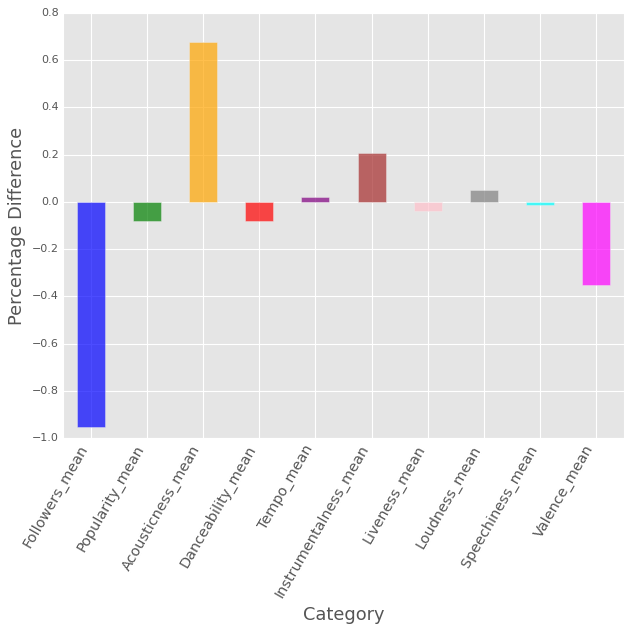

In [86]:
# Colors in graph
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create a bar plot
plt.figure(figsize=(8, 8))
#plt.title('Percentage Difference between All Liked 2500 Songs and Discover Weekly 30', fontsize=14)
combined_df['Difference Pct'].plot(kind='bar', color=colors, alpha=0.7)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Percentage Difference', fontsize=16)
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.tight_layout()
plt.show()

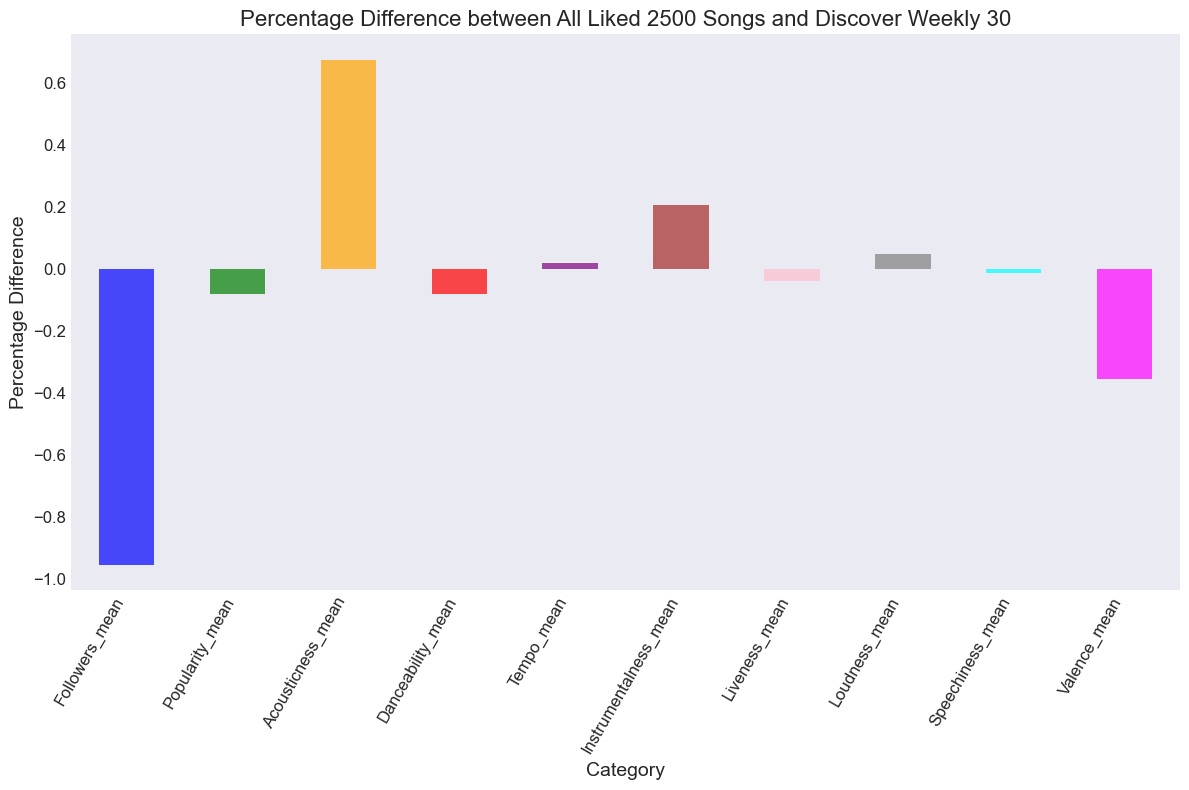

In [69]:
# Colors in graph
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create a bar plot
plt.figure(figsize=(12, 8))  # Increase the figure size if necessary
plt.title('Percentage Difference between All Liked 2500 Songs and Discover Weekly 30', fontsize=16)  # Increase title font size
combined_df['Difference Pct'].plot(kind='bar', color=colors, alpha=0.7)
plt.xlabel('Category', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Percentage Difference', fontsize=14)  # Increase y-axis label font size
plt.xticks(rotation=60, ha='right', fontsize=12)  # Increase x-axis tick label font size
plt.yticks(fontsize=12)  # Increase y-axis tick label font size
plt.tight_layout()
plt.show()


In [56]:
dw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              30 non-null     object 
 1   Artist(s)         30 non-null     object 
 2   Genre(s)          30 non-null     object 
 3   Genre(s)+GPT      30 non-null     object 
 4   Popularity        30 non-null     int64  
 5   Followers         30 non-null     int64  
 6   Acousticness      30 non-null     float64
 7   Danceability      30 non-null     float64
 8   Tempo             30 non-null     float64
 9   Instrumentalness  30 non-null     float64
 10  Liveness          30 non-null     float64
 11  Loudness          30 non-null     float64
 12  Speechiness       30 non-null     float64
 13  Time Signature    30 non-null     int64  
 14  Valence           30 non-null     float64
dtypes: float64(8), int64(3), object(4)
memory usage: 3.6+ KB


In [57]:
dw_data["Genre(s)+GPT"].value_counts()

[pop]                                                              6
[electronic]                                                       5
[edm]                                                              4
[pop edm]                                                          2
[stutter house]                                                    2
[ambient]                                                          1
[lo-fi]                                                            1
[trance, vocal trance]                                             1
[trap]                                                             1
[wave]                                                             1
[chillstep]                                                        1
[house]                                                            1
[dutch house, edm, electro house, pop dance, progressive house]    1
[progressive house, progressive trance house]                      1
[chillsynth]                      

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

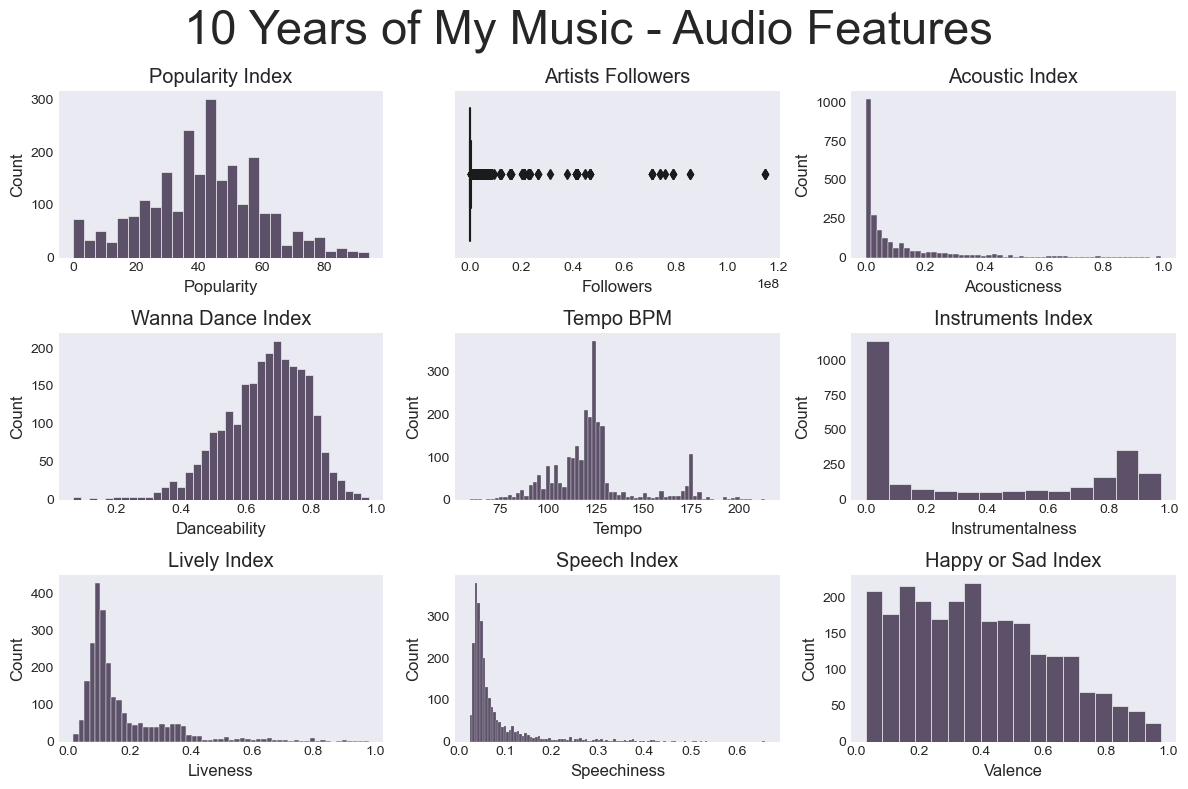

In [59]:
# This is matplotlib syntax
# Figure and axis to keep track of in 

# Streamlit 
# Set the color palette

sns.set_palette("mako")

plt.style.use("seaborn-v0_8-dark")

fig, ax = plt.subplots(3,3, figsize=(12,8))
plt.suptitle("10 Years of My Music - Audio Features ", fontsize = 34)
ax[0][0].title.set_text("Popularity Index")
sns.histplot(x="Popularity", data=dw_data_all_liked, ax=ax[0][0]) # Row and column position in ax
ax[0][1].title.set_text("Artists Followers")
sns.boxplot(x="Followers", data=dw_data_all_liked, ax=ax[0][1])
ax[0][2].title.set_text("Acoustic Index")
sns.histplot(x="Acousticness", data=dw_data_all_liked, ax=ax[0][2])
ax[1][0].title.set_text("Wanna Dance Index")
sns.histplot(x="Danceability", data=dw_data_all_liked, ax=ax[1][0])
ax[1][1].title.set_text("Tempo BPM")
sns.histplot(x="Tempo", data=dw_data_all_liked, ax=ax[1][1])
ax[1][2].title.set_text("Instruments Index")
sns.histplot(x="Instrumentalness", data=dw_data_all_liked, ax=ax[1][2])
ax[2][0].title.set_text("Lively Index")
sns.histplot(x="Liveness", data=dw_data_all_liked, ax=ax[2][0])
ax[2][1].title.set_text("Speech Index")
sns.histplot(x="Speechiness", data=dw_data_all_liked, ax=ax[2][1])
ax[2][2].title.set_text("Happy or Sad Index")
sns.histplot(x="Valence", data=dw_data_all_liked, ax=ax[2][2])

plt.tight_layout()
plt.show()

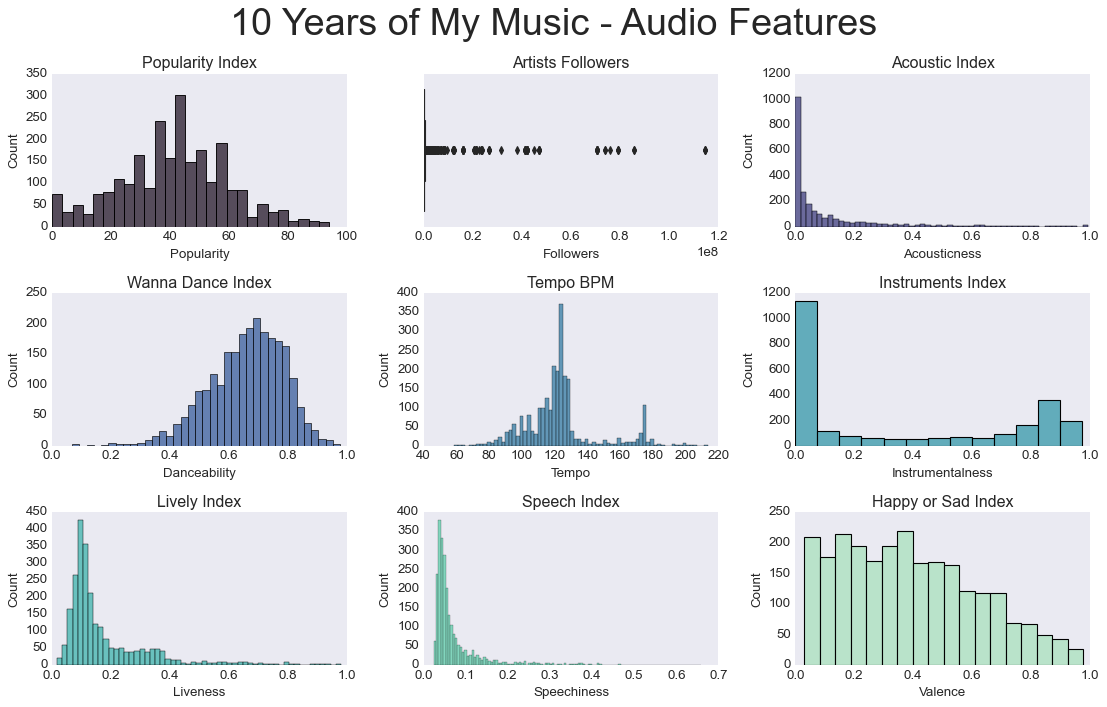

In [335]:
# Set the color palette
sns.color_palette("mako", as_cmap=True)

# Set the style
plt.style.use("seaborn-v0_8-dark")

# Create the subplots
fig, ax = plt.subplots(3, 3, figsize=(14, 9))
plt.suptitle("10 Years of My Music - Audio Features", fontsize=34)

# Define colors from the palette
colors = sns.color_palette("mako", n_colors=9)  # Choose 9 colors for 9 plots

# Plot each feature with different colors
ax[0][0].title.set_text("Popularity Index")
sns.histplot(x="Popularity", data=dw_data_all_liked, ax=ax[0][0], color=colors[0])
ax[0][1].title.set_text("Artists Followers")
sns.boxplot(x="Followers", data=dw_data_all_liked, ax=ax[0][1], color=colors[1])
ax[0][2].title.set_text("Acoustic Index")
sns.histplot(x="Acousticness", data=dw_data_all_liked, ax=ax[0][2], color=colors[2])
ax[1][0].title.set_text("Wanna Dance Index")
sns.histplot(x="Danceability", data=dw_data_all_liked, ax=ax[1][0], color=colors[3])
ax[1][1].title.set_text("Tempo BPM")
sns.histplot(x="Tempo", data=dw_data_all_liked, ax=ax[1][1], color=colors[4])
ax[1][2].title.set_text("Instruments Index")
sns.histplot(x="Instrumentalness", data=dw_data_all_liked, ax=ax[1][2], color=colors[5])
ax[2][0].title.set_text("Lively Index")
sns.histplot(x="Liveness", data=dw_data_all_liked, ax=ax[2][0], color=colors[6])
ax[2][1].title.set_text("Speech Index")
sns.histplot(x="Speechiness", data=dw_data_all_liked, ax=ax[2][1], color=colors[7])
ax[2][2].title.set_text("Happy or Sad Index")
sns.histplot(x="Valence", data=dw_data_all_liked, ax=ax[2][2], color=colors[8])

# Add a tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
dw_data_all_liked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              2489 non-null   object 
 1   Artist(s)         2489 non-null   object 
 2   Genre(s)          2489 non-null   object 
 3   Popularity        2489 non-null   int64  
 4   Followers         2489 non-null   int64  
 5   Acousticness      2488 non-null   float64
 6   Danceability      2488 non-null   float64
 7   Tempo             2488 non-null   float64
 8   Instrumentalness  2488 non-null   float64
 9   Liveness          2488 non-null   float64
 10  Loudness          2488 non-null   float64
 11  Speechiness       2488 non-null   float64
 12  Time Signature    2488 non-null   float64
 13  Valence           2488 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 272.4+ KB


In [67]:
dw_data_all_liked["Followers"].mean()

1629196.842507031

In [68]:
dw_data_all_liked["Followers"].median()

42394.0

# 6) Request to summarise the results of the playlist vs. all liked songs

In [61]:
sound_features = {
    'Followers': "Number of followers for the artist.",
    'Popularity': "The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.",
    'Acousticness': 'A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.',
    'Danceability': 'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.',
    'Tempo': 'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.',
    'Instrumentalness': 'Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.',
    'Liveness': 'Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.',
    'Loudness': 'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.',
    'Speechiness': 'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.',
    'Valence': 'A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'
}

In [62]:
combined_df

,All Liked 2500 Songs,Discover Weekly 30,Difference,Difference Pct
Followers_mean,1629196.842507,76856.800000,-1552340.042507,-0.952825
Popularity_mean,41.413419,38.066667,-3.346752,-0.080813
Acousticness_mean,0.115428,0.193542,0.078114,0.676736
Danceability_mean,0.657942,0.605200,-0.052742,-0.080162
Tempo_mean,123.119257,125.483167,2.363909,0.019200
Instrumentalness_mean,0.353309,0.426461,0.073152,0.207048
Liveness_mean,0.177929,0.171503,-0.006426,-0.036113
Loudness_mean,-7.124739,-7.483833,-0.359095,0.050401
Speechiness_mean,0.076074,0.075127,-0.000947,-0.012447
Valence_mean,0.390446,0.252530,-0.137916,-0.353227


In [63]:
dw_genres_gpt = dw_data["Genre(s)+GPT"]

In [64]:
dw_genres_gpt

0                                             [ambient]
1                                          [electronic]
2                                                 [pop]
3                                               [lo-fi]
4                                                 [pop]
5                                          [electronic]
6                                [trance, vocal trance]
7                                             [pop edm]
8                                                [trap]
9                                                [wave]
10                                         [electronic]
11                                                [pop]
12                                      [stutter house]
13                                      [stutter house]
14                                          [chillstep]
15                                              [house]
16                                                [pop]
17                                              

In [298]:
# Send the question to chat GPT in order to get a reponse back
response2 = openai.ChatCompletion.create(
    # What model to use
    model="gpt-4",
    # The full message including the role of the chat assistant and the first message
    messages=[
        {"role": "system", "content": f"You specialize in comparing playlist based on sound features {sound_features}"},
        {"role": "user", "content": f" you are presenting this weeks playlist with these genres {dw_genres_gpt} and sound features {combined_df_json}. The presentation should be three sentences (of which only one mentiones genres) and only include the sound features which are more than 0.1 different and not mention any percentages, numbers or playlists. "}
    ],
    # Max token to set price caps
    max_tokens=3000,
    # Temperature set, indicates how random the model should be in picking a word (0 is not randomness and 1 is wild)
    temperature=1
)

In [299]:
response2

<OpenAIObject chat.completion id=chatcmpl-7v5NbM5ylGTVZ3mARZfEhc8uVYCMf at 0x28e284a10> JSON: {
  "id": "chatcmpl-7v5NbM5ylGTVZ3mARZfEhc8uVYCMf",
  "object": "chat.completion",
  "created": 1693839731,
  "model": "gpt-4-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Ladies and gentlemen, I present to you a diverse music selection where you go on a sensory journey, from the ambient tranquility, through the dynamic pulse of EDM and hyperbop, to the soulful rhythm of indie pop. The playlist showcases an increase in acousticness, bringing to your ears the raw and authentic melodies that resonate with your inner musophile. Another noticeable shift is in the realm of valence, introducing tracks with a more melancholic tone, revealing the profound depths of evocative music."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 1347,
    "completion_tokens": 103,
    "total_tokens": 1450
  }
}

In [280]:
response2["choices"][0]["message"]["content"]

"In the heart-racing city of Harmonia, Oscar found himself engrossed in the multitudes of interconnected, music-induced realities. From the euphoric realms of Pop and dizzying peaks of EDM, to the soothing valleys of ambient and reflective pools of lo-fi beats, he travelled at tempo, a traveller carried by wave upon an audacious wave of rhythm. Despite the roar of the city, Oscar sought solace in spaces with unassuming acousticness, with the sound serenading his exploration like an unbroken narrative. Yet, he marveled as he danced through the city streets, guided by the staggering strength of the instrumentals, entrancing him into an otherworldly trance. Amidst it all, Oscar realised the city’s valence fluctuating like day and night, the city's pulse swaying from euphoric heights into palpitating depths, mirroring the ever-changing soundtrack of his wild adventure."

In [65]:
dw_datacopy = dw_data

In [66]:
dw_datacopy.drop("Genre(s)+GPT", axis=1)

,Song,Artist(s),Genre(s),Popularity,Followers,Acousticness,Danceability,Tempo,Instrumentalness,Liveness,Loudness,Speechiness,Time Signature,Valence
0,Celestial,Nomyn,[],37,20027,0.001200,0.481000,82.451000,0.923000,0.107000,-6.078000,0.034800,4,0.200000
1,Seaside,Attom,[],44,41885,0.076700,0.655000,105.107000,0.904000,0.141000,-6.781000,0.037600,4,0.041100
2,Meet You There,"LE YORA, SOMMA, Jewels, yuma., MAGNUS",[],27,1178,0.012600,0.689000,122.011000,0.820000,0.153000,-9.441000,0.039800,4,0.124000
3,falling easy,sad face.,[],26,2260,0.464000,0.728000,107.026000,0.021000,0.112000,-7.749000,0.251000,4,0.341000
4,Way Back,Boeuv,[],20,574,0.884000,0.668000,126.028000,0.873000,0.101000,-12.513000,0.030900,4,0.478000
5,Damaged Friday,"eeph, Jani, Feverkin",[],11,671,0.170000,0.508000,159.898000,0.489000,0.054600,-10.127000,0.073700,4,0.432000
6,Forever Young - Morgin Madison Remix,"JES, Morgin Madison","[trance, vocal trance]",41,28147,0.011600,0.556000,125.045000,0.000132,0.186000,-3.822000,0.104000,4,0.244000
7,Manzanita,Surf Mesa,[pop edm],60,162169,0.003510,0.612000,126.986000,0.858000,0.144000,-5.081000,0.034000,4,0.061000
8,Goosebumps,Whammyboy,[],30,2373,0.048000,0.742000,130.037000,0.000568,0.075500,-5.780000,0.055300,4,0.797000
9,Tell Me,Hermei,[wave],32,3892,0.142000,0.562000,110.997000,0.853000,0.152000,-11.483000,0.033300,4,0.056900


# 7) Ask for share of electronic tracks

In [90]:
# Send the question to chat GPT in order to get a reponse back
response3 = openai.ChatCompletion.create(
    # What model to use
    model="gpt-4",
    # The full message including the role of the chat assistant and the first message
    messages=[
        {"role": "system", "content": f"You categorize subgenres into broader genres"},
        {"role": "user", "content": f" Can you summarize of large share of these songs are electronic music or a subgenre of electronic music? Please answer with a number ranging from 0-30, and a short summary of the most popular genres in this weeks playlist {dw_genres_gpt}"}
    ],
    # Max token to set price caps
    max_tokens=3000,
    # Temperature set, indicates how random the model should be in picking a word (0 is not randomness and 1 is wild)
    temperature=1
)

In [91]:
response3

<OpenAIObject chat.completion id=chatcmpl-7vMAeLqIBaxPuCIsXYY3WBaX25xTh at 0x17d191f70> JSON: {
  "id": "chatcmpl-7vMAeLqIBaxPuCIsXYY3WBaX25xTh",
  "object": "chat.completion",
  "created": 1693904276,
  "model": "gpt-4-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "18 out of 30 songs are either purely electronic music or a subgenre of electronic music. Some of the most popular genres in this week's playlist include pop, electronic, and various subgenres of electronic music such as trance, lo-fi, trap, chillstep, and house. Other popular genres include edm, dutch house, progressive house, and hyperpop."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 265,
    "completion_tokens": 74,
    "total_tokens": 339
  }
}